## Observing the effect of learning rate
After observing the effect of number of hidden units, in this part the effect of learning rate is observed. Here in the experiments, for each learning rate value, a different hyper-parameter set has been used to see whether the model can be trained with such a rate or not.
### Necessary Imports
The used libraries were identical to the ones that are used for the previous part. In addition to personal impelementations *ann.py* and *dataset_setup.py* numpy and matplotlib are the libraries used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ann import *
from dataset_setup import *

### Importing the data
Here the dataset that is going to be used is retreved from the data files that already exist. For importing and normalizing the data, the utilities provided in *Dataset* class are used.

In [2]:
file_paths = ['data/train1.txt', 
              'data/test1.txt', 
              'data/train2.txt', 
              'data/test2.txt']
dataset_1 = Dataset(file_paths[0], file_paths[1])
dataset_2 = Dataset(file_paths[2], file_paths[3])

### Helper Functions
In order to plot and demonstrate the results obtained for the trials made, the following helper functions are used. The explanations regarding these functions are provided in the file *Finding a Configuration for Each Dataset (1 - A).ipynb*. 

In [3]:
def draw_uniform_samples(data, no_of_samples):
    max_values = np.max(data, axis=0)
    min_values = np.min(data, axis=0)
    dist = np.random.uniform(min_values[0], max_values[0], no_of_samples)
    return dist

In [4]:
def plot_losses(losses):
    epoch_count = len(losses)
    plt.plot(range(1, epoch_count + 1), losses)
    plt.title("Loss vs Epoch Count", fontsize=14)
    plt.ylabel("Loss", fontsize=10)
    plt.xlabel("Epoch", fontsize=10)

In [5]:
def plot_predictions(samples, dist_count, model, title, data_label, loc):
    dist = draw_uniform_samples(samples, dist_count)
    dist = np.reshape(dist, (len(dist), 1))
    y_pred = model.predict(dist)
    sort = list(sorted(zip(dist, y_pred)))
    dist, y_pred = zip(*sort)
    plt.title(title, fontsize=14)
    plt.xlabel("x", fontsize=10)
    plt.ylabel("y", fontsize=10)
    plt.scatter(samples[:, 0], samples[:, 1], label=data_label)
    plt.plot(dist, y_pred, label="Learned model", c="red", lw=2.5)
    plt.legend(loc=loc, borderaxespad=1.0)

In [6]:
def get_loss(data, model):
    labels = data[:, 1]
    samples = data[:, 0]
    samples = np.reshape(samples, (len(samples), 1))
    y_pred = model.predict(samples)
    print("Standard Deviation of loss: {:.4f}".format(np.std(model.loss(labels, y_pred, stage="forward"), axis=0)))
    loss = np.sum(model.loss(labels, y_pred, stage="forward"), axis=0) / len(labels)
    return loss

In [7]:
normalized_train_2, normalized_test_2 = dataset_2.normalize_data()

### Learning rate: 1
With a learning rate this high, the model is not expected to learn any meaningful information since it does not have the ability of healthily moving towards a global optimum point in terms of gradients. Due to this behavior it is expected from the model to flunctuate between loss values that are far from 0. The loss curve plotted for this experiment also proves this finding. The loss curve and the learned data distribution is given below.

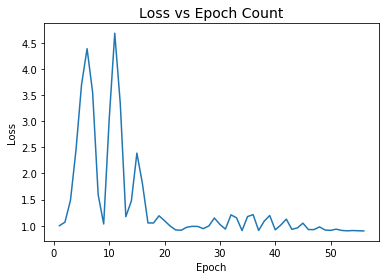

In [74]:
lr_1_model = ANN(input_dim=1, weight_range=0.0003, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="sigmoid")

lr_1_losses = lr_1_model.fit(normalized_train_2, 100, learning_rate=1, update="batch", momentum_enabled=True, alpha=0.1, threshold=0.9)

plot_losses(lr_1_losses)

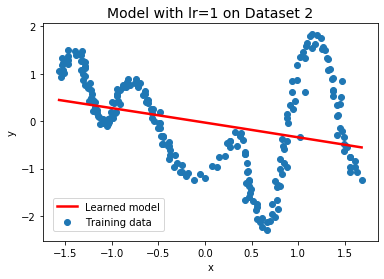

In [75]:
plot_predictions(normalized_train_2, 500, lr_1_model, "Model with lr=1 on Dataset 2", "Training data", "lower left")

In [76]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, lr_1_model)))

Standard Deviation of loss: 1.1828
Training Loss: 0.8985


In [77]:
print("Threshold: 0.9, Epoch count: {}".format(len(lr_1_losses)))

Threshold: 0.9, Epoch count: 56


### Learning Rate: 0.1
By lowering the learning rate to 0.1, a value that is suitable for batch learning achieved. Since for each update, batch learning performs one update with such a value convergence is achieved. Comparing with the previous experiment, the ability that using a lower learning rate gives to the model in terms of finding an optimum set of gradients is observed. Originating from the experiments conducted in part c, the threshold for convergence is set around 0.1 as it is the point where optimal model with 8 hidden units achieve. The loss curve and the learned data distributipn is given below.

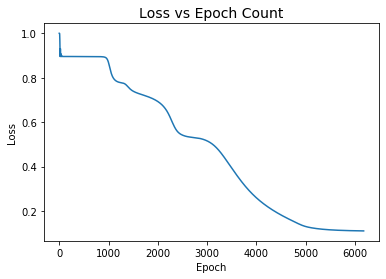

In [60]:
lr_0_1_model = ANN(input_dim=1, weight_range=0.0001, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

lr_0_1_losses = lr_0_1_model.fit(normalized_train_2, 10000, learning_rate=0.1, update="batch", momentum_enabled=True, alpha=0.1, threshold=0.11)

plot_losses(lr_0_1_losses)

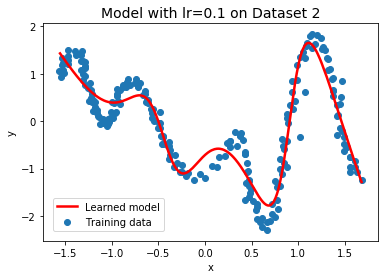

In [61]:
plot_predictions(normalized_train_2, 500, lr_0_1_model, "Model with lr=0.1 on Dataset 2", "Training data", "lower left")

In [62]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, lr_0_1_model)))

Standard Deviation of loss: 0.2225
Training Loss: 0.1100


In [63]:
print("Threshold value: 0.11, No of epochs: {}".format(len(lr_0_1_losses)))

Threshold value: 0.11, No of epochs: 6173


### Learning rate: 0.01
By even lowering the learning rate, a rate that is suitable for Stochastic learning is found. Since SGD algorithm moves along the gradient space with smaller updates in purpose, this type of a learning rate would be more suitable. After initially training the model by 10000 epochs and together with the experiments performed in part c, 0.25 is found as a suitable threshold. However with such a learning rate SGD algorithm gets stuck at a local minima due to the relatively large value of learning rate. This is the main reason why learning stops at such an early stage. The loss curves and the learned data distribution is given below.

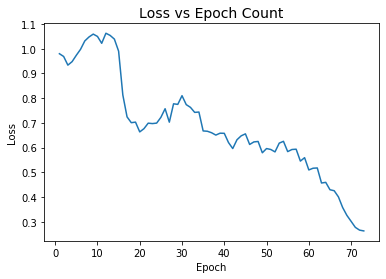

In [166]:
lr_0_01_model = ANN(input_dim=1, weight_range=0.003, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

lr_0_01_losses = lr_0_01_model.fit(normalized_train_2, 8000, learning_rate=0.01, update="sgd", momentum_enabled=True, alpha=0.4, threshold=0.25)

plot_losses(lr_0_01_losses)

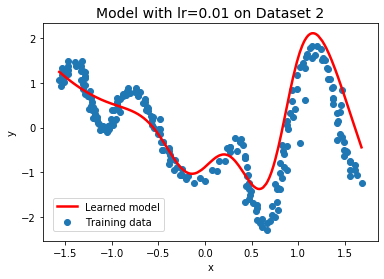

In [167]:
plot_predictions(normalized_train_2, 500, lr_0_01_model, "Model with lr=0.01 on Dataset 2", "Training data", "lower left")

In [168]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, lr_0_01_model)))

Standard Deviation of loss: 0.5242
Training Loss: 0.3428


In [169]:
print("Threshold: 0.2, Epoch count: {}".format(len(lr_0_01_losses)))

Threshold: 0.2, Epoch count: 73


### Learning Rate: 0.001
Following the discussion regarding learning rate 0.01 for SGD learning algorithm, by even loweing the learning rat, an algorithm that is able to bypass local minimas can be found. By keeping the learning rate not too high or not too low consdiering the learning algorithm, a model that fits well to the give data distribution can be found. The loss curve and the learned data distribution is given below.

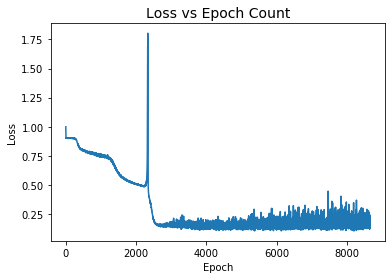

In [150]:
lr_0_001_model = ANN(input_dim=1, weight_range=0.001, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

lr_0_001_losses = lr_0_001_model.fit(normalized_train_2, 10000, learning_rate=0.001, update="sgd", momentum_enabled=True, alpha=0.3, threshold=0.1)

plot_losses(lr_0_001_losses)

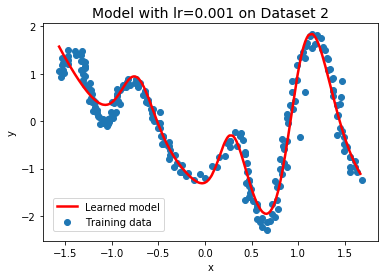

In [151]:
plot_predictions(normalized_train_2, 500, lr_0_001_model, "Model with lr=0.001 on Dataset 2", "Training data", "lower left")

In [152]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, lr_0_001_model)))

Standard Deviation of loss: 0.2146
Training Loss: 0.0875


In [153]:
print("Threshold: 0.10, Epoch count: {}".format(len(lr_0_001_losses)))

Threshold: 0.10, Epoch count: 8664


### Learning Rate: 0.0001 
As a learning rate too small, the value 0.0001 has been tried out. As it can be seen from the change of loss value ang epochs, the learning confinues in an extremely stable way but it is considerably smaller than the other alternatives. The loss curve and the learned data distribution is given below.

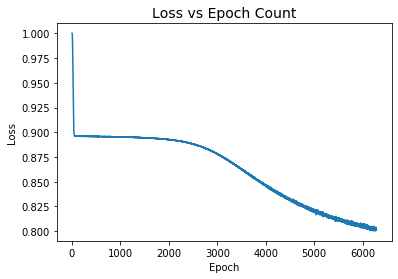

In [180]:
lr_0_0001_model = ANN(input_dim=1, weight_range=0.001, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

lr_0_0001_losses = lr_0_0001_model.fit(normalized_train_2, 50000, learning_rate=0.0001, update="sgd", momentum_enabled=True, alpha=0.3, threshold=0.8)

plot_losses(lr_0_0001_losses)

In [181]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, lr_0_0001_model)))

Standard Deviation of loss: 1.0982
Training Loss: 0.8017


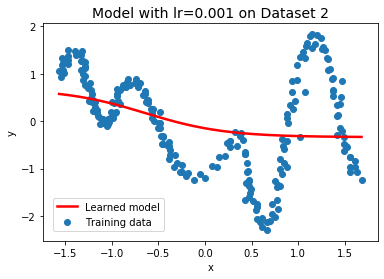

In [182]:
plot_predictions(normalized_train_2, 500, lr_0_0001_model, "Model with lr=0.001 on Dataset 2", "Training data", "lower left")

In [183]:
print("Threshold: 0.8, Epoch Count: {}".format(len(lr_0_0001_losses)))

Threshold: 0.8, Epoch Count: 6286
